# EJECUCIÓN PRESUPUESTAL DE LA NACIÓN

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.image as mpimg
import cv2
import matplotlib.patches as patches
from PIL import Image

## 1. Leer Información

In [2]:
archivo = input("Ingrese nombre del archivo: ")
data = pd.read_csv(archivo+".csv")
data.head()

Ingrese nombre del archivo: 2019


,NombreEntidad,Departamento,Ciudad,Sector,Rama,DestinoGasto,EstadoContrato,DescripciondelProceso,TipodeContrato,ModalidaddeContratacion,...,FechadeFindelContrato,TipoDocProveedor,ProveedorAdjudicado,EsGrupo,EsPyme,ValordelContrato,ValorPendientedePago,ValorPagado,DiasAdicionados,Anho
0,CORPOAMAZONIA - CORPORACION PARA EL DESARROLLO...,Putumayo,Mocoa,Ambiente y Desarrollo Sostenible,Corporacion Autonoma,Inversion,Activo,Prestar sus servicios profesionales a la Entid...,Prestacion de servicios,Contratacion directa,...,2019-08-20,Cedula de Ciudadania,Karen Dayana Montenegro Chiran,False,False,12.250,12.250,0.0,0.0,2019.0
1,SECRETARIA DISTRITAL DE SEGURIDAD CONVIVENCIA...,Distrito Capital de Bogota,No Definido,No aplica/No pertenece,Ejecutivo,Inversion,Modificado,PRESTAR LOS SERVICIOS PROFESIONALES EN DERECHO...,Prestacion de servicios,Contratacion directa,...,2020-04-30,Cedula de Ciudadania,YENNY PAOLIN DAZA GUTIERREZ,False,False,63.963,63.963,0.0,91.0,2019.0
2,ALCALDIA MUNICIPAL FUSAGASUGA,Cundinamarca,Fusagasuga,No aplica/No pertenece,Ejecutivo,Inversion,Activo,SERVICIOS PROFESIONALES PARA EL FORTALECIMIENT...,Prestacion de servicios,Contratacion directa,...,2019-12-27,Cedula de Ciudadania,Sandra milena Gutierrez Castanho,False,True,30.723,30.723,0.0,0.0,2019.0
3,INSTITUTO DISTRITAL DE LA PARTICIPACION Y ACCI...,Distrito Capital de Bogota,No Definido,Inclusion Social y Reconciliacion,Ejecutivo,Inversion,Modificado,Prestar los servicios profesionales con auton...,Prestacion de servicios,Contratacion directa,...,2019-12-31,Cedula de Ciudadania,ANGELA LUCIA HERNANDEZ PINHEROS,False,False,57.200,0.000,57.2,15.0,2019.0
4,COMPLEJO CARCELARIO Y PENITENCIARIO DE IBAGUE ...,Tolima,Ibague,Ley de Justicia,Ejecutivo,Funcionamiento,Activo,FIN CONTRATAR LA ADQUISICION DE ELEMENTOS DE O...,Compraventa,Minima cuantia,...,2019-07-30,NIT,DISTRIBUCIONES ALIADAS BJ SAS,False,True,24.000,24.000,0.0,0.0,2019.0


In [3]:
data.shape

(139028, 22)

In [4]:
column_data = data.columns.values.tolist()
column_data

['NombreEntidad',
 'Departamento',
 'Ciudad',
 'Sector',
 'Rama',
 'DestinoGasto',
 'EstadoContrato',
 'DescripciondelProceso',
 'TipodeContrato',
 'ModalidaddeContratacion',
 'FechadeFirma',
 'FechadeIniciodelContrato',
 'FechadeFindelContrato',
 'TipoDocProveedor',
 'ProveedorAdjudicado',
 'EsGrupo',
 'EsPyme',
 'ValordelContrato',
 'ValorPendientedePago',
 'ValorPagado',
 'DiasAdicionados',
 'Anho']

In [5]:
data.describe()

,ValordelContrato,ValorPendientedePago,ValorPagado,DiasAdicionados,Anho
count,139028.000000,139028.000000,139028.000000,139028.000000,139028.0
mean,182.015682,171.050030,23.006744,1.273283,2019.0
std,3612.533321,3839.299928,415.357936,13.035735,0.0
min,0.000000,-47.780039,0.000000,0.000000,2019.0
25%,13.651000,4.326000,0.000000,0.000000,2019.0
50%,27.792434,17.950925,0.000000,0.000000,2019.0
75%,55.000000,43.142867,4.000000,0.000000,2019.0
max,685636.968401,685636.968401,58180.334144,1096.000000,2019.0


In [6]:
data.NombreEntidad.unique()

array(['CORPOAMAZONIA - CORPORACION PARA EL DESARROLLO SOSTENIBLE DEL SUR DE LA AMAZONIA',
       'SECRETARIA DISTRITAL DE SEGURIDAD  CONVIVENCIA Y JUSTICIA',
       'ALCALDIA MUNICIPAL FUSAGASUGA', ...,
       'ESTABLECIMIENTO PENITENCIARIO Y CARCELARIO SAN ANDRES INPEC',
       'ICBF REGIONAL CESAR', 'ALCALDIA MUNICIPIO PAIME'], dtype=object)

In [7]:
data.Departamento.unique()

array(['Putumayo', 'Distrito Capital de Bogota', 'Cundinamarca', 'Tolima',
       'Valle del Cauca', 'Casanare', 'Risaralda', 'Meta', 'Antioquia',
       'Caqueta', 'Santander', 'Atlantico', 'Norte de Santander',
       'Bolivar', 'Caldas', 'Huila', 'La Guajira', 'Vichada', 'Boyaca',
       'Cesar', 'No Definido', 'San Andres, Providencia y Santa Catalina',
       'Cauca', 'Guaviare', 'Narinho', 'Cordoba', 'Amazonas', 'Quindio',
       'Magdalena', 'Sucre', 'Guainia', 'Arauca', 'Choco', 'Vaupes'],
      dtype=object)

In [8]:
data.Sector.unique()

array(['Ambiente y Desarrollo Sostenible', 'No aplica/No pertenece',
       'Inclusion Social y Reconciliacion', 'Ley de Justicia',
       'Hacienda y Credito Publico', 'Salud y Proteccion Social',
       'Planeacion', 'Cultura', 'defensa', 'deportes',
       'Educacion Nacional', 'Servicio Publico', 'interior', 'Trabajo',
       'Transporte', 'agricultura', 'Vivienda, Ciudad y Territorio',
       'Minas y Energia', 'Informacion Estadistica', 'Ciencia Tecnologia',
       'Presidencia de la Republica', 'Industria',
       'Tecnologias de la Informacion y las Comunicaciones',
       'Relaciones Exteriores',
       'Inteligencia Estrategica y Contrainteligencia'], dtype=object)

In [9]:
data.Rama.unique()

array(['Corporacion Autonoma', 'Ejecutivo', 'Judicial', 'Legislativo'],
      dtype=object)

In [10]:
data.DestinoGasto.unique()

array(['Inversion', 'Funcionamiento', 'No Definido'], dtype=object)

In [11]:
data.Anho.unique()

array([2019.])

## 2. Consultar los Contratos más Costosos y la Deuda por Departamento

### Requerimiento 1 : Contratos más Costosos

In [12]:
#df_contrato_costoso = data[data]
df_contrato_costoso=data.sort_values("ValordelContrato").tail(10)
df_contrato_costoso=df_contrato_costoso.loc[:,["NombreEntidad",
                                               "Departamento",
                                               "ProveedorAdjudicado",
                                               "ValordelContrato"]]
df_contrato_costoso

,NombreEntidad,Departamento,ProveedorAdjudicado,ValordelContrato
114400,UNIDAD DE SERVICIOS PENITENCIARIOS Y CARCELARI...,Distrito Capital de Bogota,CONSORCIO FUNDACION 2020,183630.270298
128943,MINISTERIO DE EDUCACION NACIONAL (MEN),Distrito Capital de Bogota,INSTITUTO COLOMBIANO DE CREDITO EDUCATIVO Y ES...,248453.357124
15225,INSTITUTO DE DESARROLLO URBANO,Distrito Capital de Bogota,CONSORCIO CARACAS SUR,256554.412806
58177,DIRECCION GENERAL DE SANIDAD MILITAR,Distrito Capital de Bogota,HOSPITAL MILITAR CENTRAL,271556.235168
87705,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR OCC...,Distrito Capital de Bogota,Brigitte Lorena Rincon Bello,310120.202359
119725,DISPENSARIO MEDICO DE CALI,Valle del Cauca,UT FABILU,323783.467000
71580,FONDO ROTATORIO DEL MINISTERIO DE RELACIONES E...,Distrito Capital de Bogota,UT PASAPORTES 2.019,332018.554517
42390,INSTITUTO DISTRITAL DE DEPORTE Y RECREACION DE...,Bolivar,FUNDACION GOLES POR LA VIDA,359800.000000
18103,EMPRESA DE TRANSPORTE DEL TERCER MILENIO TRANS...,Distrito Capital de Bogota,MASIVO BOGOTA S.A.S.,503262.600000
124462,SENA DIRECCION GENERAL Direccion Juridica,Distrito Capital de Bogota,Colombia Telecomunicaciones S.A. ESP,685636.968401


### Requerimiento 2 : Deuda por Departamento

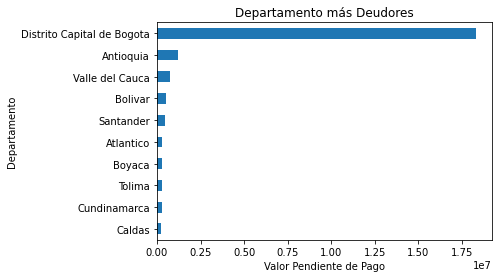

In [13]:
df_deuda_dpto=data.groupby("Departamento")["ValorPendientedePago"].sum()
df_deuda_dpto=df_deuda_dpto.sort_values().tail(10)
df_deuda_dpto.plot(kind="barh")
plt.xlabel("Valor Pendiente de Pago")
plt.title("Departamento más Deudores")
plt.show()

## 3. Estudiar los Valores de los Contratos por Rama del estado

### Requerimiento 3: Valor total de los contratos por cada rama

In [14]:
lim_inferior=float(input("Ingrese el valor en pesos del limite inferior: "))
lim_superior=float(input("Ingrese el valor en pesos del limite superior: "))

Ingrese el valor en pesos del limite inferior: 1
Ingrese el valor en pesos del limite superior: 10


In [15]:
df_rama = data[(data["ValordelContrato"] >= lim_inferior) & (data["ValordelContrato"] <= lim_superior)]
df_rama.head(5)

,NombreEntidad,Departamento,Ciudad,Sector,Rama,DestinoGasto,EstadoContrato,DescripciondelProceso,TipodeContrato,ModalidaddeContratacion,...,FechadeFindelContrato,TipoDocProveedor,ProveedorAdjudicado,EsGrupo,EsPyme,ValordelContrato,ValorPendientedePago,ValorPagado,DiasAdicionados,Anho
5,MUNICIPIO DE SANTIAGO DE CALI - DEPARTAMENTO A...,Valle del Cauca,Cali,Hacienda y Credito Publico,Corporacion Autonoma,Funcionamiento,Activo,Prestar los servicios Profesionales como Aboga...,Prestacion de servicios,Contratacion directa,...,2019-05-01,Cedula de Ciudadania,Jaime Alberto Restrepo Garcia,False,False,10.000000,10.000000,0.0,0.0,2019.0
11,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,Cundinamarca,Fusagasuga,Ley de Justicia,Ejecutivo,Funcionamiento,Cerrado,CONTRATAR ADQUISICION MATERIAL PARA EL FUNCION...,Suministros,Minima cuantia,...,2019-10-30,NIT,L&S INVERSIONES SAS,False,True,7.449903,7.449903,0.0,0.0,2019.0
13,INPEC-RECLUSION DE MUJERES DE PEREIRA,Risaralda,Dosquebradas,Ley de Justicia,Ejecutivo,Funcionamiento,terminado,CONCENTRADO (ALIMENTO) MATERIAL VETERINARIO Y...,Compraventa,Minima cuantia,...,2019-05-18,Cedula de Ciudadania,Vivian Mejia o Agroanimales,False,True,4.459925,4.459925,0.0,0.0,2019.0
16,SUBRED INTEGRADA DE SERVICIOS DE SALUD SUR E.S.E,Distrito Capital de Bogota,Bogota,Salud y Proteccion Social,Ejecutivo,Funcionamiento,Modificado,PRESTAR SERVICIOS DE APOYO A LA GESTION ASISTE...,DecreeLaw092/2017,Contratacion regimen especial,...,2019-09-30,Cedula de Ciudadania,carlos mario martinez alvarez,False,True,9.528960,9.528960,0.0,0.0,2019.0
24,SECRETARIA DE DEPORTE Y RECREACION DE SANTIAGO...,Valle del Cauca,Cali,deportes,Ejecutivo,Inversion,Modificado,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,Prestacion de servicios,Contratacion directa,...,2019-06-01,Cedula de Ciudadania,ALAN JIMENO PAZ RIVADENEIRA,False,False,4.140000,4.140000,0.0,0.0,2019.0


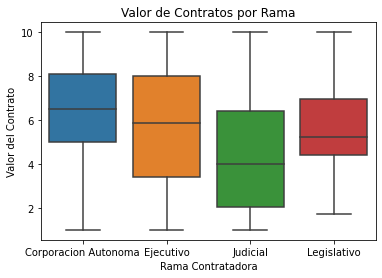

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Rama",y="ValordelContrato",data=df_rama)
plt.ylabel("Valor del Contrato")
plt.xlabel("Rama Contratadora")
plt.title("Valor de Contratos por Rama")
plt.show()

### Requerimiento 4: Repartición Porcentual del Valor Total de los Contratos entre las Diferentes Ramas del estado

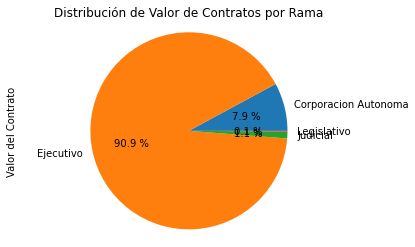

In [17]:
data.groupby("Rama")["ValordelContrato"].sum().plot(kind="pie",
                                                   autopct="%0.1f %%")
plt.ylabel("Valor del Contrato")
plt.axis("equal")
plt.title("Distribución de Valor de Contratos por Rama")
plt.show()

### Requerimiento 5: Distribución de los Valores de los Contratos

* KDE -> Kernel Density Estimation

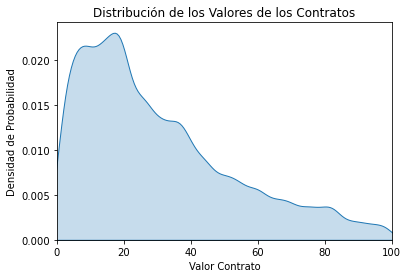

In [18]:
data_100 = data[data.ValordelContrato<100]
sns.kdeplot(data_100.ValordelContrato,shade=True)
plt.xlim((0,100))
plt.title("Distribución de los Valores de los Contratos")
plt.xlabel("Valor Contrato")
plt.ylabel("Densidad de Probabilidad")
plt.show()

## 4. Estudiar los Valores de los Contratos por Sector y Departamento

### Requerimiento 6: Construcción de la Matriz de Departamentos VS Sectores

In [19]:
data_filter = data[data.Departamento != "No Definido"]
new_data = data_filter.loc[:,["Departamento","Sector","ValordelContrato"]]
new_data = new_data.groupby(["Departamento","Sector"]).sum()
new_data=new_data.pivot_table("ValordelContrato",index="Departamento",columns="Sector")
new_data=new_data.fillna(0)
new_data

Sector,Ambiente y Desarrollo Sostenible,Ciencia Tecnologia,Cultura,Educacion Nacional,Hacienda y Credito Publico,Inclusion Social y Reconciliacion,Industria,Informacion Estadistica,Ley de Justicia,Minas y Energia,...,Salud y Proteccion Social,Servicio Publico,Tecnologias de la Informacion y las Comunicaciones,Trabajo,Transporte,"Vivienda, Ciudad y Territorio",agricultura,defensa,deportes,interior
Departamento,,,,,,,,,,,,,,,,,,,,,
Amazonas,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,36.513254,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.028948e+03,0.000000,0.000000
Antioquia,52939.180109,0.000000,1729.000000,2.441300e+03,0.000000,0.000000e+00,0.000000,2545.285753,27921.014011,0.000000,...,4.108356e+04,6.592706e+05,20153.145561,5191.326154,0.000000e+00,583.484285,0.000000,6.261735e+04,5371.210120,24.987008
Arauca,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,315.622654,0.000000,...,4.579839e+03,5.123778e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,8.036832e+03,0.000000,0.000000
Atlantico,0.000000,0.000000,0.000000,1.113372e+03,0.000000,0.000000e+00,0.000000,3501.432658,7715.688139,0.000000,...,1.845972e+04,3.185681e+04,0.000000,161.713548,1.149450e+02,0.000000,0.000000,3.617590e+04,0.000000,0.000000
Bolivar,1946.133880,0.000000,164.163000,7.457484e+02,0.000000,0.000000e+00,0.000000,0.000000,6506.424168,0.000000,...,1.045117e+05,7.709883e+03,0.000000,58.183799,2.623243e+02,0.000000,0.000000,3.974907e+04,381265.152258,0.000000
Boyaca,4796.710681,0.000000,568.434334,8.988234e+02,1014.458970,0.000000e+00,0.000000,0.000000,11415.528798,0.000000,...,4.607774e+03,2.655991e+04,0.000000,1064.292998,0.000000e+00,0.000000,0.000000,1.970833e+04,514.205200,0.000000
Caldas,7263.758326,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,22.991875,7631.991255,0.000000,...,1.400816e+04,4.061600e+03,0.000000,51.964084,0.000000e+00,0.000000,0.000000,1.477858e+04,0.000000,0.000000
Caqueta,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1526.890563,0.000000,...,2.478019e+03,8.932965e+02,0.000000,25.817201,0.000000e+00,4816.823800,0.000000,2.289233e+04,0.000000,0.000000
Casanare,4934.973740,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1558.592597,0.000000,...,6.226080e+03,5.217663e+02,0.000000,35.913252,0.000000e+00,0.000000,0.000000,1.179081e+04,139.187000,0.000000


### Requerimiento 7: Sectores en los que el Estado Invierte más y menos, de acuerdo al valor de sus contratos

In [20]:
def Sectores_inversion(data:pd.DataFrame,info:int,):
    new_sector = data.columns.values.tolist()
    min_sector=[]
    if info == 0:
        minimo = [9999999,""]
        for i in new_sector:
            suma = new_data[i].sum()
            min_sector.append(suma)
            if suma < minimo[0]:
                minimo[0] = suma
                minimo[1] = i
        return (minimo[0],minimo[1])
    if info == 1:
        maximo = [0,""]
        for i in new_sector:
            suma = new_data[i].sum()
            min_sector.append(suma)
            if suma > maximo[0]:
                maximo[0] = suma
                maximo[1] = i
        return (maximo[0],maximo[1])

In [21]:
info =int(input('''Ingrese 0 para el sector de menor gasto y 1 para 
el de mayor gasto: '''))
Sectores_inversion(new_data,info)

Ingrese 0 para el sector de menor gasto y 1 para 
el de mayor gasto: 0


(28007.232309000014, 'Ciencia Tecnologia')

### Requerimiento 8: Valor Total de los Contratos de un departamento

In [22]:
def valor_departamento(data:pd.DataFrame,departamento:str):
    data=data.reset_index(level=0)
    new_departamento = data.Departamento.unique().tolist()
    if departamento in new_departamento:
        valor=data[data.Departamento==departamento].sum(axis=1).tolist()
        return(departamento+": Valor Total -> "+str(valor))
    else:
        return ("Verifique que este bien escrito -> :(")

In [23]:
info_dep = input("Ingrese el Departamento: ")
valor_departamento(new_data,info_dep)

Ingrese el Departamento: Meta


'Meta: Valor Total -> [54998.87749099995]'

### Requerimiento 9: con Mayor Gasto

In [24]:
data=new_data.reset_index(level=0)
new_departamento = data.Departamento.unique().tolist()
suma_lista = []
for list_dep in new_departamento:
    suma_lista.append([data[data.Departamento==list_dep].sum(axis=1).tolist(),list_dep])   
suma_lista.sort(reverse=True)
#suma_lista[0][0]
dic_valor = {}
for i in range(10):
    dic_valor[suma_lista[i][1]] = suma_lista[i][0]
df_dep_mayor_costo = pd.DataFrame.from_dict(dic_valor,orient="index",columns=['Gasto'])
df_dep_mayor_costo

,Gasto
Distrito Capital de Bogota,1.978954e+07
Antioquia,1.882704e+06
Valle del Cauca,7.643695e+05
Bolivar,5.473029e+05
Tolima,2.958053e+05
Santander,2.895558e+05
Huila,2.772704e+05
Caldas,2.548352e+05
Cundinamarca,2.519884e+05
Magdalena,1.404783e+05


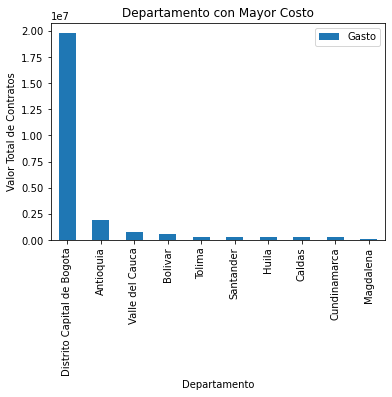

In [25]:
df_dep_mayor_costo.plot(kind="bar")
plt.title("Departamento con Mayor Costo")
plt.ylabel("Valor Total de Contratos")
plt.xlabel("Departamento")
plt.show()

### Requerimiento 10: Departamento mas Dedicado a un Sector

In [87]:
df = pd.DataFrame({})
info_sector = input("Ingrese el Sector: ")
data_1=new_data.reset_index(level=0)
df=data_1.copy()
df["Valor Contracto Departamento"] = data_1.sum(axis=1)
df["% Gasto Sector"] = df[info_sector]/df["Valor Contracto Departamento"]*100
df=df.sort_values("% Gasto Sector",ascending=False)
df_final = df.iloc[0:5]
list_departamento = df_final.Departamento.tolist()
list_gasto = df_final["% Gasto Sector"].tolist()
dic_departamento = {}
for i in range(5):
    dic_departamento[list_departamento[i]] = list_gasto[i]
dic_departamento

Ingrese el Sector: Ley de Justicia


{'Norte de Santander': 31.6939731995574,
 'Cauca': 28.1796409289057,
 'Sucre': 27.538720981167593,
 'Cesar': 27.058623159520444,
 'Narinho': 23.01186909556356}

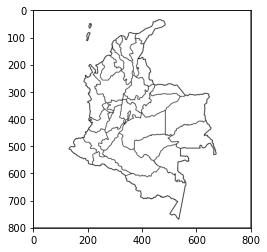

In [47]:
mapa = mpimg.imread("mapa.png").tolist()
plt.imshow(mapa)
plt.show()

In [92]:
def cargar_coordenadas(nombre_archivo:str,diccionario:dict)->dict:        
    deptos = {}     
    archivo = open(nombre_archivo, encoding="utf8")     
    titulos = archivo.readline()     
    linea = archivo.readline()     
    while len(linea) > 0:         
        linea = linea.strip()         
        datos = linea.split(";")         
        deptos[datos[0]] = (int(datos[2]),int(datos[1]))         
        linea = archivo.readline()
    valor = []
    for key in diccionario:
        valor.append(deptos.get(key))
    return valor

In [102]:
uno,dos,tres,cuatro,cinco=cargar_coordenadas("coordenadas.txt",
                                             dic_departamento)

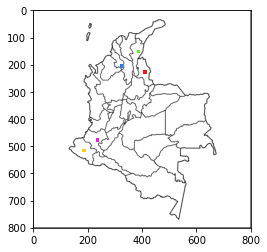

In [108]:
img = np.array(Image.open('mapa.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle patch
rect = patches.Rectangle((405,220),13,13,linewidth=1,
                         facecolor=[0.94,0.10,0.10])
ax.add_patch(rect)
rect = patches.Rectangle(dos,13,13,linewidth=1,
                         facecolor=[0.94,0.10,0.85])
ax.add_patch(rect)
rect = patches.Rectangle(tres,13,13,linewidth=1,
                         facecolor=[0.10,0.50,0.94])
ax.add_patch(rect)
rect = patches.Rectangle(cuatro,13,13,linewidth=1,
                         facecolor=[0.34,0.94,0.10])
ax.add_patch(rect)
rect = patches.Rectangle(cinco,13,13,linewidth=1,
                         facecolor=[0.99,0.82,0.09])
ax.add_patch(rect)

plt.show()

In [109]:
##fin